# Exercise: Tokenization Methods

**Objective**:
* Explore how different tokenization methods (word-level, character-level, and subword-level using BPE) affect the performance of a text classification model.
* Gain practical experience in preprocessing, tokenization, model training, and evaluation in NLP.

**Dataset**:

> We’ll use the IMDb Movie Reviews dataset, which contains labeled positive and negative movie reviews. This dataset includes natural language, slang, and rare words, making tokenizer choice significant.

**Instructions:**

*	Implement the tokenization functions where indicated.
*	Experiment with different parameters and observe the effects.
*	Answer the thought exercises to deepen your understanding.


**Duration**: *Approximately* 20-30 minutes

## Step 1: Import Necessary Libraries

*In this step, we'll import all the required libraries for the exercise.*

In [44]:
# Standard libraries
import nltk
import pandas as pd
import numpy as np

# For tokenization and BPE
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('movie_reviews')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

## Step 2: Load the Dataset

*Here, we'll load the movie reviews dataset and create a DataFrame.*

In [45]:
# Build a DataFrame from the movie reviews
from nltk.corpus import movie_reviews

documents = [(movie_reviews.raw(fileid), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

df = pd.DataFrame(documents, columns=['review', 'sentiment'])
print("Sample data:")
print(df.head())

Sample data:
                                              review sentiment
0  plot : two teen couples go to a church party ,...       neg
1  the happy bastard's quick movie review \ndamn ...       neg
2  it is movies like these that make a jaded movi...       neg
3   " quest for camelot " is warner bros . ' firs...       neg
4  synopsis : a mentally unstable man undergoing ...       neg


## Step 3: Data Preprocessing

*In this step, we'll convert labels to numerical values and split the data into training and testing sets.*

In [46]:
# Convert labels to binary values
df['sentiment_num'] = df.sentiment.map({'neg': 0, 'pos': 1})

# Split the data
X = df['review']
y = df['sentiment_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 4: Define Tokenization Functions

*Implement the tokenization functions below. You'll create functions for word-level, character-level, and subword-level (BPE) tokenization.*

### Task: Implement the Tokenizers

- **Word-Level Tokenization:** Use NLTK's `word_tokenize`.
- **Character-Level Tokenization:** Convert the text into a list of characters.
- **Subword-Level Tokenization (BPE):** Train a BPE tokenizer on the training data using `sentencepiece`.

In [47]:
# TODO: Implement the tokenization functions

# Word-Level Tokenization
def tokenize_word_level(text):
  # Your code here
  return tokens

# Character-Level Tokenization
def tokenize_char_level(text):
  # Your code here
  return tokens

# Subword-Level Tokenization (BPE)
# First, train a BPE tokenizer on the training data
import sentencepiece as spm

# Save training reviews to a file
with open('bpe_train.txt', 'w', encoding='utf-8') as f:
    for line in X_train:
        f.write(line + '\n')

# Train BPE model
# Your code here - play with hyperparams
spm.SentencePieceTrainer.train(input='bpe_train.txt', model_prefix='bpe', vocab_size=5000, model_type='bpe')

# Load the trained model
sp = spm.SentencePieceProcessor()
sp.load('bpe.model')

def tokenize_bpe(text):
    tokens = sp.encode(text, out_type=str)
    return tokens

## Step 5: Vectorization and Model Training

*Here, we'll create a function to vectorize the data and train the model.*

### Task: Complete the `vectorize_and_train` Function

- Adjust the function to print the number of features (vocabulary size).
- Ensure it works correctly with different tokenizers.

In [48]:
def vectorize_and_train(X_train, X_test, y_train, y_test, tokenizer, tokenizer_name):
    # Tokenize the text
    if tokenizer_name == 'Character-Level':
        # For character-level tokenization, use analyzer='char'
        vectorizer = CountVectorizer(analyzer='char')
        X_train_vec = vectorizer.fit_transform(X_train)
        X_test_vec = vectorizer.transform(X_test)
    else:
        # For other tokenizers
        X_train_tokens = [' '.join(tokenizer(text.lower())) for text in X_train]
        X_test_tokens = [' '.join(tokenizer(text.lower())) for text in X_test]

        vectorizer = CountVectorizer()
        X_train_vec = vectorizer.fit_transform(X_train_tokens)
        X_test_vec = vectorizer.transform(X_test_tokens)

    # Print vocabulary size
    print(f"Vocabulary size using {tokenizer_name}: {len(vectorizer.get_feature_names_out())}")

    # Train MultinomialNB classifier
    model = MultinomialNB()
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Results using {tokenizer_name} Tokenization:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

    return accuracy, f1

## Step 6: Run Experiments with Different Tokenizers

*Now, we'll run the experiments with the different tokenizers and collect the results.*

In [49]:
# Dictionary to store results
results = {}

# Word-Level Tokenization
accuracy_word, f1_word = vectorize_and_train(X_train, X_test, y_train, y_test, tokenize_word_level, 'Word-Level')
results['Word-Level'] = {'Accuracy': accuracy_word, 'F1 Score': f1_word}

# Character-Level Tokenization
accuracy_char, f1_char = vectorize_and_train(X_train, X_test, y_train, y_test, None, 'Character-Level')
results['Character-Level'] = {'Accuracy': accuracy_char, 'F1 Score': f1_char}

# BPE Tokenization
accuracy_bpe, f1_bpe = vectorize_and_train(X_train, X_test, y_train, y_test, tokenize_bpe, 'BPE')
results['BPE'] = {'Accuracy': accuracy_bpe, 'F1 Score': f1_bpe}

Vocabulary size using Word-Level: 36242
Results using Word-Level Tokenization:
Accuracy: 0.8100
F1 Score: 0.8031
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       199
           1       0.84      0.77      0.80       201

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400

--------------------------------------------------
Vocabulary size using Character-Level: 71
Results using Character-Level Tokenization:
Accuracy: 0.6450
F1 Score: 0.6651
              precision    recall  f1-score   support

           0       0.66      0.59      0.62       199
           1       0.63      0.70      0.67       201

    accuracy                           0.65       400
   macro avg       0.65      0.64      0.64       400
weighted avg       0.65      0.65      0.64       400

--------------------------------------------------
Vocabulary 

## Step 7: Analyze and Discuss the Results

*We'll gather the results into a DataFrame and display a graph.*


Summary of results:
                 Accuracy  F1 Score
Word-Level          0.810  0.803109
Character-Level     0.645  0.665094
BPE                 0.770  0.768844


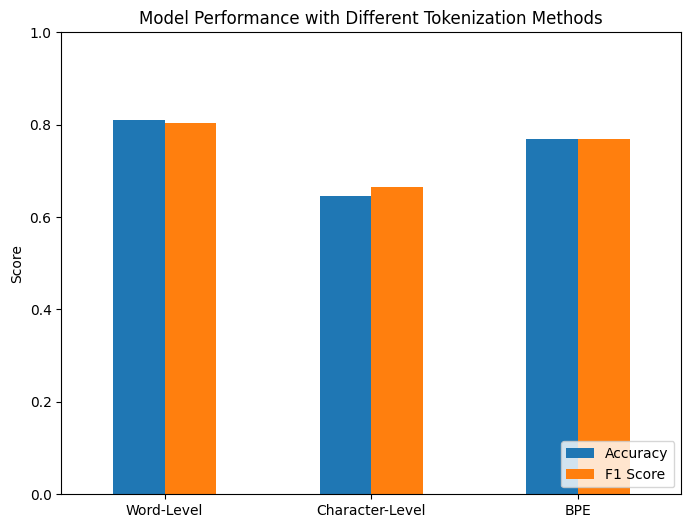

In [50]:
# Create a DataFrame from the results
results_df = pd.DataFrame(results).T
print("\nSummary of results:")
print(results_df)

# Display the results in a bar chart
results_df.plot(kind='bar', ylim=(0,1), figsize=(8,6))
plt.title('Model Performance with Different Tokenization Methods')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

## Step 8: Additional Analysis

*We'll display the number of tokens each tokenizer produces on a sample text.*

### Task: Analyze the Token Counts

- Select a sample text from `X_train`.
- Use each tokenizer to tokenize the sample text.
- Print the number of tokens produced by each tokenizer.

In [51]:
# Select a sample text
sample_text = X_train.iloc[0]

# Tokenize with different tokenizers
tokens_word = tokenize_word_level(sample_text)
tokens_char = tokenize_char_level(sample_text)
tokens_bpe = tokenize_bpe(sample_text)

# Print the number of tokens
print("Number of tokens in the sample text:")
print(f"Word-Level Tokenization: {len(tokens_word)} tokens")
print(f"Character-Level Tokenization: {len(tokens_char)} tokens")
print(f"BPE Tokenization: {len(tokens_bpe)} tokens")

Number of tokens in the sample text:
Word-Level Tokenization: 952 tokens
Character-Level Tokenization: 5083 tokens
BPE Tokenization: 1316 tokens


## Thought Exercises

1. **Impact of Vocabulary Size:**
   - **Question:** How does the vocabulary size differ between tokenization methods, and what is the impact on the model?
   - **Consideration:** A large vocabulary can lead to higher computational complexity and potential overfitting, while a small vocabulary might not capture enough information.

2. **Trade-offs in Tokenization:**
   - **Question:** What are the advantages and disadvantages of each tokenization method in handling rare or unknown words?
   - **Consideration:** Word-level tokenization struggles with rare words, character-level may lose semantic meaning, and BPE offers a balance.

3. **Model Performance:**
   - **Question:** Why might one tokenization method yield better performance than others in this classification task?
   - **Consideration:** The method that best captures the most significant features of the text for the given task will perform better.